## Project 1 - Part 2

## <em> Linear Algebra and Optimization</em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br>

<span style="color:blue"><i> Write your partner's name here (if you have one). </i></span> <br>

***
### Link Okpy

In [ ]:
from client.api.notebook import Notebook
ok = Notebook('project1_p2_G.ok')
_ = ok.auth(inline = True)

### Imports

In [1]:
import numpy as np
from scipy.integrate import quad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LogNorm

***

#### Problem 1 - Constraining the cosmological parameters using the Planck power spectrum

<i>Planck</i> is the third-generation space telescope, following COBE and WMAP, and it aims to determine the geometry and content of the Universe by observing the cosmic microwave background radiation (CMB), emitted around 380,000 years after the Big Bang. Permeating the whole universe and containing information on the properties of the early Universe, the CMB is widely known as the strongest evidence for the Big Bang model. <br><br>
Measuring the spectrum of the CMB, we confirm that it is very close to the radiation from an ideal blackbody, and flunctuations in the spectrum are very small. Averaging ocer all locations, its mean temperature is $2.725K$, and its root mean square temperature fluctuation is $\langle(\frac{\delta T}{T})^2\rangle^{1/2} = 1.1 \times 10^{-5}$ (i.e. the temperature of the CMB varies by only ~ 30 $\mu K$ across the sky). <br>
![alt text](Planck.png "Title")
<br>
Suppose you observe the fluctuations $\delta T/T$. Since we are taking measurements on the surface of a sphere, it is useful to expand $\delta T/T$ in spherical harmonics (because they form a complete set of orthogonal functions on the sphere):<br>
$$ \frac{\delta T}{T} (\theta, \phi) = \sum_{l = 0}^{\infty} \sum_{m = -l}^{l} \mathrm{a}_{lm} \mathrm{Y}_{lm} (\theta, \phi) $$
<br>
In flat space, we can do a Fourier transform of a function $f(x)$ as $\sum_k \mathrm{a}_k \mathrm{e}^{ikx}$ where $k$ is the wavenumber, and $|\mathrm{a}_k|$ determines the amplitude of the mode. For spherical harmonics, instead of $k$, we have $l$, the number of the modes along a meridian, and $m$, the number of modes along the equator. So $l$ and $m$ determine the wavelength ($\lambda = 2\pi/l$) and shape of the mode, respectively.
<br><br>
In cosmology, we are mostly interested in learning the statistical properties of this map and how different physical effects influence different physical scales, so it is useful to define the correlation function $C(\theta)$ and split the CMB map into different scales. 
<br><br>
Suppose that we observe $\delta T/T$ at two different points on the sky. Relative to an observer, they are in direction $\hat{n}$ and $\hat{n}'$ and are separated by an angle $\theta$ given by $cos\theta = \hat{n} \cdot \hat{n}'$ Then, we can find the correlation function by multiplying together the values of $\delta T/T$ at the two points and average the product over all points separated by the angle $\theta$.
$$ C(\theta)^{TT} =  \Big\langle \frac{\delta T}{T}(\hat{n})\frac{\delta T}{T}(\hat{n}') \Big\rangle_{\hat{n} \cdot \hat{n}' = cos\theta}$$
<br><br>
The above expression is specific to the temperature fluctuations, but we can also do a similar analysis for the polarization map of the CMB. (The CMB is polarized because it was scattered off of free electrons during decoupling.) We decompose the polarization pattern in the sky into a curl-free "E-mode" and grad-free "B-mode." 
<br><br>
However, the CMB measurements (limited by the experiment resolution and the patch of sky examined) tell us about $C(\theta)$ over only a limited range of angular scales. (i.e. the precise values of $C(\theta)$ for all angles from $\theta = 0$ to $\theta = 180^\circ$ is not known.) Hence, using the expansion of $\delta T/T$ in spherical harmonics, we write the correlation function as:
$$ C(\theta) = \frac{1}{4\pi}\sum_{l=0}^\infty (2l+1) C_l P_l(cos\theta) $$
where $P_l$ are the Legendre polynomials.
<br><br>
So we break down the correlation function into its multipole moments $C_l$, which is the angular power spectrum of the CMB.
![alt text](multipoles.png "Title")
<br><br>
Remember that $\lambda = 2\pi/l$. So $C_l$ measures the amplitude as a function of wavelength. ($C_l = \frac{1}{2l+1}\sum_{m = -l}^l |\mathrm{a}_{lm}|^2$). In this problem, we will consider the E-mode power spectrum $C_l^{EE} = \frac{1}{2l+1}\sum_{m = -l}^l |\mathrm{a}_{lm}^E|^2$
<br><br>
THe CMB angular power spectrum is usually expressed in terms of $D_l = l(l+1)C_l/2\pi$ (in unit of $\mu K^2$) because this better shows the contribution toward the variance of the temperature fluctuations.
<br><br>
Cosmologists built a software called "cosmological boltzmann code" which computes the theoretical power spectrum given cosmological parameters, such as the Hubble constant and the baryon density. Therefore, we can fit the theory power spectrum to the measured one in order to obtain the best-fit parameters.
<br><br>
Here, we consider six selected cosmological parameters, $\vec{\theta} = [\theta_1, \theta_2, ..., \theta_6] = [H_0, \Omega_b h^2, \Omega_c h^2, n_s, A_s, \tau]$. ($H_0$ = Hubble constant, $\Omega_b h^2$ = physical baryon density parameter, $\Omega_c h^2$ = physical cold dark matter density parameter, $n_s$ = scalar spectral index, $A_s$ = curvature fluctuation amplitude, $\tau$ = reionization optical depth.). We provide you with the measured CMB E-mode power spectrum from Planck Data Release 2. Then, assuming a simple linear model of the CMB power spectrum (i.e. assuming its respose to those parameters are linear), we estimate the best-fit values of $\vec{\theta}$ using linear algebra and Gauss-Newton optimization and plot their 1-$\sigma$, 2-$\sigma$ confidence regions.
<br><br>
Then, how do we build a linear model of the theory power spectrum? Suppose a very simple scenario where you wish to determine the best-fit value of $H_0$ assuming all the other parameters are already known (so $\theta = H_0$ in this case). The measurements from WMAP (the CMB satellite which preceded Planck and consequently had a lower resolution) estimate that $H_0 = 73.2$. You take it as your starting value $\theta_{ini}$ and compute the theory power spectrum there using the Boltzmann code. You also compute the derivative of $D_l$ with respect to $\theta$ at $\theta_{ini}$. Then, you can estimate the power spectrum as you perturb $\theta$ around $\theta_{ini}$:
<br><br>
$$ D_l^{model}(\theta = \theta_{ini} + \delta \theta) = D_l^{model}(\theta_{ini}) + \frac{\partial D_l}{\partial \theta}\Big\vert_{\theta = \theta_{ini}} \delta \theta. $$
<br>
From Planck, you get the measured $D_l$ and error $\sigma_l$, so you can find the best-fit value of $H_0$ which minimizes $\chi^2 = ((D_l^{measured} - D_l^{model})/\sigma_l)^2$. Also note that you expect the best-fit values from Planck will be close to WMAP estimate, so the above linear model is a valid approximation.
<br><br>
Now, we can similarly build a simple linear model power spectrum with six parameters. We take $\vec{\theta}_{ini}$ as an estimate of the cosmological parameters from WMAP data (https://lambda.gsfc.nasa.gov/product/map/dr2/params/lcdm_wmap.cfm).
<br>
$$ D_l^{model}(\vec{\theta} = \vec{\theta}_{ini} + \delta \vec{\theta}) = D_l^{model}(\vec{\theta}_{ini}) + \sum_{i=1}^6 \frac{\partial D_l}{\partial \theta_i}\Big\vert_{\vec{\theta} = \vec{\theta}_{ini}} \delta \theta_i $$
<br>
So you can find the best-fit values of the above six cosmological parameters ($\vec{\theta}_{best-fit}$) which minimizes
<br><br>
$$ \chi^2(\vec{\theta}) = \sum_{l=l_{min}}^{l_{max}} \Big(\frac{D_l^{measured} - D_l^{model}(\vec{\theta})}{\sigma_l}\Big)^2 $$
<br>
(i.e. when $\vec{\theta} = \vec{\theta}_{best-fit}$, $\chi^2$ is minimized.)
<br><br>
<i>References</i> :
<br>
Intro to Cosmology, Barbara Ryden
<br>
http://folk.uio.no/hke/AST5220/v11/AST5220_2_2011.pdf
<br>
http://cosmology.berkeley.edu/~yuki/CMBpol/

The below cell defines $l, D_l^{measured}, \sigma_l, \vec{\theta}_{ini}, D_l^{model}(\vec{\theta}_{ini}), \frac{\partial D_l}{\partial \theta_i}\Big\vert_{\vec{\theta} = \vec{\theta}_{ini}}$ (In problem 1, we only consider the CMB E-mode power spectrum, so $D_l$ refers to $D_l^{EE}$.)<br><br>
Here, we set $l_{min} = 2, l_{max} = 2000$, and we have 92 $l$-bins in this range (For $2 \leq l < 30$, the power spectra are not binned ($\Delta l = 1$), and for $30 \leq l < 2000$, they are binned, and the bin size is $\Delta l = 30$). We obtain the measured and model power spectrum in that 92 $l$-bins.

In [ ]:
# Load Data

# Measured power spectra from Planck
data = np.loadtxt("Project1_EE_measured.dat")
# l (same for all model and measured power spectrum)
ell = data[:,0]
# D_l^EE (measured)
EE_measured = data[:,1]
# and error
error_EE_measured = data[:,2]

# initial estimate of the parameters (\theta_{ini}) - from https://lambda.gsfc.nasa.gov/product/map/dr2/params/lcdm_wmap.cfm
H0     = 73.2
ombh2  = 0.02229
omch2  = 0.1054
ns     = 0.958
As     = 2.347e-9
tau    = 0.089

theta_ini = np.array([H0, ombh2, omch2, ns, As, tau])


# Model power spectra given \theta_{ini} (calculated at the same ell bins as the measured power spectrum)
data = np.loadtxt("Project1_EE_model_at_theta_ini.dat")
# D_l^EE (model)
EE_model = data[:,1]

# Derivative of the power spectra at \theta = \theta_{ini} (calculated at the same ell bins as the measured power spectrum)
data = np.loadtxt("Project1_derivative_EE_at_theta_ini.dat")
# Derivative of D_l^EE with respect to six parameters 
# ([theta1, theta2, theta3, theta4, theta5, theta6] = [H_0, \Omega_b h^2, \Omega_c h^2, n_s, A_s, \tau])
deriv_DlEE_theta1 = data[:,1]
deriv_DlEE_theta2 = data[:,2]
deriv_DlEE_theta3 = data[:,3]
deriv_DlEE_theta4 = data[:,4]
deriv_DlEE_theta5 = data[:,5]
deriv_DlEE_theta6 = data[:,6]

<span style="color:blue"> <i> 1. Plot the measured power spectrum with errorbar. Also, plot the model power spectrum on top, by interpolating between the data points. You should find that the data from Planck does not fit to the model very well. To better see the low-$l$ measurements, also plot both spectra in the range $2 \leq l < 30$. Remember that the power spectra $D_l$ have units of $\mu K^2$. Don't forget to label all plots. </i></span>

In [ ]:
...

<span style="color:blue"> <i> 2. Using the techniques from linear algebra (normal equations, SVD, etc), find the best-fit cosmological parameters ($\vec{\theta}_{best-fit}$). Print $\vec{\theta}_{best-fit}$. </i></span>
<br><br>
Take a look at the undergrad version for hints

In [ ]:
...

We can define $\chi^2(\vec{\theta}) = \vec{r}(\vec{\theta})^T\ \vec{r}(\vec{\theta})$ where $\vec{r} = \frac{D_l^{model}\ (\vec{\theta})\ \ -\ D_l^{measured}}{\sigma_l}$. (so $\vec{r}$ is a vector of length 92.) <br><br>
We then compute the gradient and the Hessian of $\chi^2$ to apply the Gauss-Newton method. (This is a linear least squares problem, so using the Gauss-Newton method is equivalent to using the normal equations in this case - yes, you may think that it is silly to use the Gauss-Newton here! So we are expected to reach minimum just after one iteration. The Jacobian $J$ is identical to the design matrix $A$.)<br><br>
The $j$th component of the gradient is:
$$ (\nabla \chi^2(\vec{\theta}))_j = 2\sum_l r_l(\vec{\theta}) \frac{\partial r_l}{\partial \theta_j}(\vec{\theta}) $$
where $\frac{\partial r_l}{\partial \theta_j} = \frac{1}{\sigma_l} \frac{\partial D_l}{\partial \theta_j}\Big\vert_{\vec{\theta} = \vec{\theta}_{ini}}$<br><br>
Now, the Jacobian matrix $J(\vec{\theta})$ is: 
\begin{bmatrix}
    \frac{\partial r_{l_{min}}}{\partial \theta_1}(\vec{\theta}) & ... & \frac{\partial r_{l_{min}}}{\partial \theta_6}(\vec{\theta}) \\
    ....&....&....     \\
    \frac{\partial r_{l_{max}}}{\partial \theta_1}(\vec{\theta}) & ... & \frac{\partial r_{l_{max}}}{\partial \theta_6}(\vec{\theta})
\end{bmatrix}
<br><br>
The gradient of $\chi^2$ can be written as:
$$ \nabla \chi^2(\vec{\theta})= 2J(\vec{\theta})^T \vec{r}(\vec{\theta}) $$
<br><br>
Similarly, the $(i, j)$th component of the Hessian matrix of $\chi^2$ is given by:
<br><br>
$$ \frac{\partial^2 (\chi^2)}{\partial \theta_i \partial \theta_j}(\vec{\theta}) = 2\sum_l \frac{\partial r_l}{\partial \theta_i}(\vec{\theta}) \frac{\partial r_l}{\partial \theta_j}(\vec{\theta}) $$ (Here, $\frac{\partial^2 r_l}{\partial \theta_i \partial \theta_j} = 0$)
<br><br>
Because our model power spectrum is linear, we can write the Hessian matrix simply as $H(\vec{\theta}) = 2J(\vec{\theta})^TJ(\vec{\theta})$.
<br><br>
Then, using Newton's method, we can find $\vec{\theta}$ which minimizes $\chi^2$:
<br><br>
$$ \vec{\theta}^{(k+1)} = \vec{\theta}^{(k)} - \big(J(\vec{\theta}^{(k)})^TJ(\vec{\theta}^{(k)})\big)^{-1}J(\vec{\theta}^{(k)})^T \vec{r}(\vec{\theta}^{(k)}) $$
<br><br>
We have a simple linear model in this case, so we are expected to reach the minimum after one step.
<br><br>
<span style="color:blue"> <i> 3. Using the Gauss-Newton optimization, find the best-fit parameters ($\vec{\theta}_{best-fit}$). Iterate until you reach the minimum (Show that you get the best-fit values after one step). Does your result agree with Part 2? </i></span>

In [ ]:
...

We can compute the covariance matrix as $\big(J(\vec{\theta})^TJ(\vec{\theta})\big)^{-1}$. (Remember that the covariance matrix in the normal equations is $(A^T\ A)^{-1}$ where $A$ is the design matrix.) From this, we can plot 1-d and 2-d constraints on the parameters. (See Fig. 6 in Planck 2015 paper https://arxiv.org/pdf/1502.01589v3.pdf)
<br><br>
<b>1-d constraint</b> (corresponding to the plots along the diagonal in Fig. 6, Planck 2015 paper): <br><br>
First, the $i$th diagonal element of the covariance matrix correspond to $\sigma({\theta_i})^2$. Then, we can plot 1-d constraints on the parameter $\theta_i$ assuming a normal distribution with mean = $(\vec{\theta}_{best-fit})_i$ and variance = $\sigma({\theta_i})^2$.
<br><br>
<b>2-d constraint</b> (off-diagonal plots in Fig. 6, Planck 2015 paper): <br><br>
Consider two parameters $\theta_i$ and $\theta_j$ from $\vec{\theta}$. Now marginalize over other parameters - in order to marginalize over other parameters, you can simply remove those parameters' row and column from the full covariance matrix. (i.e. From the full covariance matrix, you know the variance of all six parameters and their covariances with each other. So build a smaller dimension - 2 x 2 - covariance matrix from this.) - and obtain a $2\times2$ covariance matrix:
<br><br>
$$ \mathrm{C_{ij}} =  \binom{\sigma({\theta_i})^2\ \ \ \ \ \ \mathrm{Cov}({\theta_i, \theta_j})}{\mathrm{Cov}({\theta_i, \theta_j}) \ \ \ \ \ \ \sigma({\theta_j})^2} $$
<br>
Now, we can plot the 2-dimensional confidence region ellipses from this matrix. The lengths of the ellipse axes are the square root of the eigenvalues of the covariance matrix, and we can calculate the counter-clockwise rotation of the ellipse with the rotation angle:
<br><br>
$$ \phi = \frac{1}{2} \mathrm{arctan}\Big( \frac{2\cdot \mathrm{Cov}(\theta_i, \theta_j)}{\sigma({\theta_i})^2-\sigma({\theta_j})^2} \Big) = \mathrm{arctan}(\frac{\vec{v_1}(y)}{\vec{v_1}(x)}) $$
<br>
where $\vec{v_1}$ is the eigenvector with the largest eigenvalue. So we calculate the angle of the largest eigenvector towards the x-axis to obtain the orientation of the ellipse. <br><br> 
Then, we multiply the axis lengths by some factor depending on the confidence level we are interested in. For 68%, this scale factor is $\sqrt{\Delta \chi^2} \approx 1.52$. For 95%, it is $\sqrt{\Delta \chi^2} \approx 2.48$.
<br><br>
<span style="color:blue"> <i> 4. Plot 1-d and 2-d constraints on the parameters. For 2-d plot, show 68% and 95% confidence ellipses for each pair of parameters. You can arrange those subplots in a triangle shape, as in Fig. 6, Planck 2015 (https://arxiv.org/pdf/1502.01589v3.pdf).</i></span>
<br>


In [ ]:
...

<span style="color:blue"> <i> 5. Plot $D_l^{model}(\vec{\theta}=\vec{\theta}_{ini})$ and $D_l^{model}(\vec{\theta}=\vec{\theta}_{best-fit})$ as well as $D_l^{measured}$ with errorbar. Show that with the best-fit parameters you obtained, the model power spectrum fits better to the measured data. </i></span>

In [ ]:
...

***

#### Problem 2 - Optimization

Consider the surface $z = ax^2 + by^2 - 1$. Let $a = 1$ and $b = 1$ and make the contour plot. The global minimum of this surface is at $(x,y) = (0,0)$ (marked by a star).

In [68]:
def minima_surface(x,y,a,b):
    return a*x**2+b*y**2-1

/Users/Byeonghee/anaconda/envs/testnbkit/lib/python3.6/site-packages/matplotlib/contour.py:1484: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


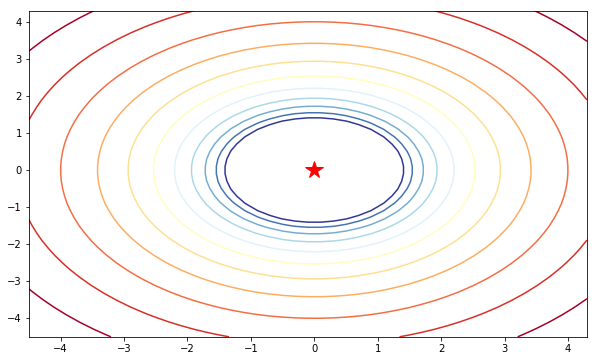

In [96]:
x, y = np.meshgrid(np.arange(-4.5, 4.5, 0.2), np.arange(-4.5, 4.5, 0.2))
fig, ax = plt.subplots(figsize=(10, 6))
z=minima_surface(x,y,1,1)
ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18)

Now, let us visualize what different gradient descent methods do. We will be especially interested in trying to understand how various hyperparameters. especially the learning rate $\eta$, affect our performance.

We denote the parameters by $\theta$ and the energy function we are trying to minimize by $E(\theta)$.

First, consider a $\textbf{simple gradient descent method}$. In this method, we will take steps in the direction of the local gradient. Given some parameters $\theta$, we adjust the parameters at each iteration so that

$$ \theta_{t+1} = \theta_t - \eta_t \nabla_{\theta} E(\theta_t) $$

where we have introduced the learning rate $\eta_t$ that controls how large a step we take. In general, the algorithm is extremely sensitive to the choice of $\eta_t$. If $\eta_t$ is too large, then one can wildly oscillate around minima and miss important structure at small scales. If $\eta_t$ is too small, then the learning/minimization procedure becomes extremely slow. This raises the natural question: What sets the natural scale for the learning rate and how can we adaptively choose it?

<span style="color:blue"> <i> 1. Run gradient descent on the surface $z = x^2 + y^2 - 1$. Start from an inital point $(-2,4)$ and plot trajectories for $\eta = 0.1, 0.5, 1$. Take 100 steps. Do you see different behaviors that arise as $\eta$ increases? (The trajectory converges to the global minima in multiple steps for small learning rates ($\eta$ = 0.1). Increasing the learning rate to 1 causes the trajectory to oscillate around the global minima before converging.) Make sure to lable each plot. </i></span>

Hint:

In this problem, $\theta = (x,y)$, and $E(\theta) = x^2 + y^2 - 1$, i.e. find $(x,y)$ which minimizes $x^2 + y^2 - 1$. Hence, $\nabla_{\theta} E(\theta) = (2x, 2y)$.
$$ (x,y)_{t+1} = (x,y)_t - \eta_t \cdot (2x, 2y)_t $$
It is given that $(x,y)_{t=0} = (-2,4)$.

Suppose that you take 3 steps and obtain $(x,y)_{t=1} = (-1.6, 3.2), (x,y)_{t=2} = (-1.3, 2.6), (x,y)_{t=3} = (-1.0, 2.0)$. Then, you can plot this trajectory in the following way:

/Users/Byeonghee/anaconda/envs/testnbkit/lib/python3.6/site-packages/matplotlib/contour.py:1484: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


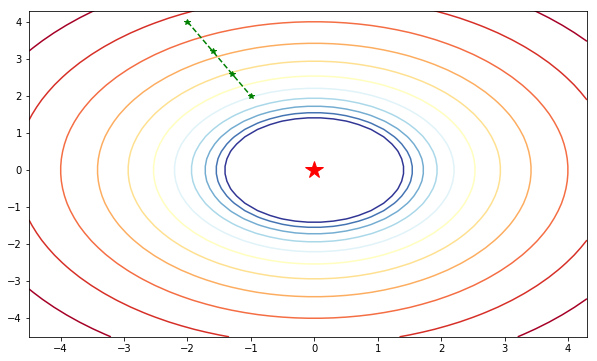

In [97]:
x, y = np.meshgrid(np.arange(-4.5, 4.5, 0.2), np.arange(-4.5, 4.5, 0.2))
fig, ax = plt.subplots(figsize=(10, 6))
z=minima_surface(x,y,1,1)
ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18)

Nsteps = 3
trajectory = np.zeros([Nsteps+1,2])
trajectory[0,:] = [-2,4]; trajectory[1,:] = [-1.6,3.2]; trajectory[2,:] = [-1.3,2.6]; trajectory[3,:] = [-1,2]; 

xs=trajectory[:,0]
ys=trajectory[:,1]
ax.plot(xs,ys, 'g--*')

plt.show()

In [ ]:
...

Next, take Beale's Function, a convex function often used to test optimization problems of the form:

$$z=(1.5−x+xy)^2+(2.25−x+xy^2)^2+(2.6250−x+xy)^3$$

The global minimum of this function is at $(3,0.5)$ (marked by a star).

In [102]:
def beales_function(x,y):
    f=np.square(1.5-x+x*y)+np.square(2.25-x+x*y*y)+np.square(2.625-x+x*y**3)
    return f

def contour_beales_function():
    #plot beales function
    x, y = np.meshgrid(np.arange(-4.5, 4.5, 0.2), np.arange(-4.5, 4.5, 0.2))
    fig, ax = plt.subplots(figsize=(10, 6))
    z=beales_function(x,y)
    ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
    ax.plot(3,0.5, 'r*', markersize=18)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    ax.set_xlim((-4.5, 4.5))
    ax.set_ylim((-4.5, 4.5))
    
    return fig,ax

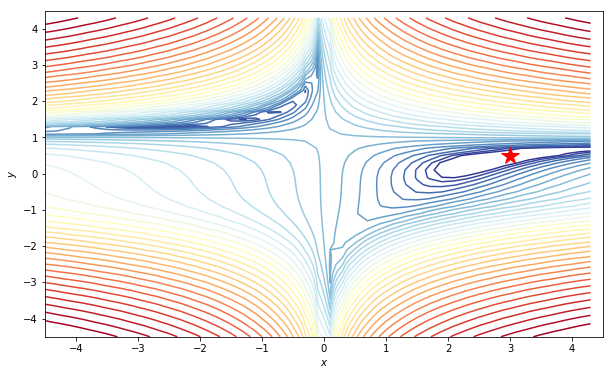

In [103]:
fig,ax =contour_beales_function()
plt.show()

One problem with gradient descent is that it has no memory of where it comes from. This can be an issue when there are many shallow minima in our landscape. If we make an analogy with a ball rolling down a hill, the lack of memory is equivalent to having has no inertia or momentum (i.e. completely overdamped dynamics). Without momentum, the ball has no kinetic energy and cannot climb out of shallow minima. Then, we can add a memory or momentum term to the stochastic gradient descent term above:

$$ v_t = \gamma v_{t-1} + \eta_t \nabla_{\theta} E(\theta_t) $$
$$ \theta_{t+1} = \theta_t - v_t $$

with $0 \leq \gamma < 1$ called the momentum parameter. When $\gamma = 0$, this reduces to ordinary gradient descent, and increasing $\gamma$ increases the inertial contribution to the gradient. From the equations above, we can see that typical memory lifetimes of the gradient is given by $(1-\gamma)^{-1}$. For $\gamma = 0$ as in gradient descent, the lifetime is just one step. For $\gamma = 0.9$, we typically remember a gradient for ten steps. We call this method $\textbf{gradient descent with momentum}$.

In stochastic gradient descent, with and without momentum, we still have to specify a schedule for tuning the learning rates $\eta_t$ as a function of time. In the context of Newton's method, this presents a number of dilemmas. The learning rate is limited by the steepest direction which can change depending on where in the landscape we are. To circumvent this problem, ideally our algorithm would take large steps in shallow, flat directions and small steps in steep, narrow directions. Second-order methods accomplish this by calculating or approximating the Hessian and normalizing the learning rate by the curvature. However, this is very computationally expensive for extremely large models. Ideally, we would like to be able to adaptively change our step size to match the landscape without paying the steep computational price of calculating or approximating Hessians.

Recently, a number of methods have been introduced that accomplish this by tracking not only the gradient but also the second moment of the gradient. These methods include AdaGrad, AdaDelta, RMS-Prop, and ADAM.

In $\textbf{ADAM}$, we keep a running average of both the first and second moment of the gradient and use this information to adaptively change the learning rate for different parameters. In addition to keeping a running average of the first and second moments of the gradient, ADAM performs an additional a bias correction to account for the fact that we are estimating the first two moments of the gradient using a running average (denoted by the hats in the update rule below). The update rule for ADAM is given by (where multiplication and division are understood to be element wise operations below)

![alt text](eq_adam3.png "Title")

where $\beta_1$ and $\beta_2$ set the memory lifetime of the first and second moment and are typically take to be $0.9$ and $0.99$ respectively, and $\eta_t$ is a learning rate typically chosen to be $10^{−3}$, and $\epsilon \sim 10^{−8}$ is a small regularization constant to prevent divergences.

<span style="color:blue"> <i> 2. Take Beale's Function. We will use 3 different methods, gradient descent with and without momentum and ADAM, to find the minimum starting at different initial points: $(x,y) = (4,3), (-2,-4), (-1,4)$. Take $10^4$ steps. Set the learning rate for gradient descent (both with and without momentum) and ADAM to $10^{-6}$ and $10^{-3}$, respectively. Plot trajectories. Make sure to lable each plot. </i></span>

Hint:

Here, $\theta$ = (x,y), and $E(\theta) = E(x,y) = (1.5−x+xy)^2+(2.25−x+xy^2)^2+(2.6250−x+xy)^3$. Hence, $\nabla_{\theta}E(\theta) = (\nabla_x E(x,y), \nabla_y E(x,y))$.

Suppose that you take 3 steps and obtain $(x,y)_{t=1} = (-1.6, 3.2), (x,y)_{t=2} = (-1.3, 2.6), (x,y)_{t=3} = (-1.0, 2.0)$. Then, you can plot this trajectory in the following way:

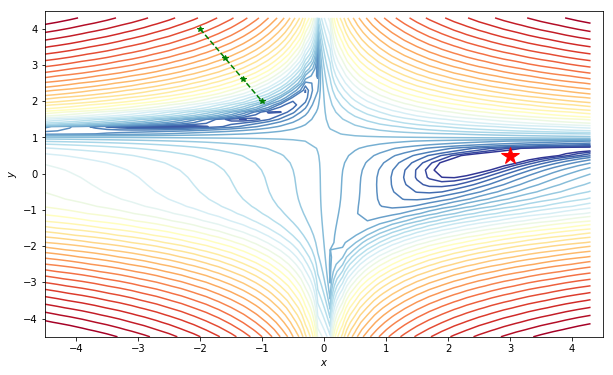

In [104]:
fig, ax=contour_beales_function()

Nsteps = 3
trajectory = np.zeros([Nsteps+1,2])
trajectory[0,:] = [-2,4]; trajectory[1,:] = [-1.6,3.2]; trajectory[2,:] = [-1.3,2.6]; trajectory[3,:] = [-1,2]; 

xs=trajectory[:,0]
ys=trajectory[:,1]
ax.plot(xs,ys, 'g--*')

plt.show()

In [ ]:
...

***

## To Submit
Execute the following cell to submit.
If you make changes, execute the cell again to resubmit the final copy of the notebook, they do not get updated automatically.<br>
__We recommend that all the above cells should be executed (their output visible) in the notebook at the time of submission.__ <br>
Only the final submission before the deadline will be graded. 


In [ ]:
_ = ok.submit()